# Проект 2. Разведывательный анализ данных

## 2.1. Описание задачи

Исследования показывают, что 14 из каждых 10 опрошенных любят шоколад.

— Сандра Бойнтон

Research tells us fourteen out of any ten individuals likes chocolate.

— Sandra Boynton

 

Вы работаете в крупной корпорации в сфере FMCG (Fast-Moving Consumer Goods) на позиции Junior Data Scientist. 
![alt_img](pic/dialog.gif)
Рынок бурлит новыми идеями и продуктами: даже Mars экспериментируют со второй палочкой Twix. Ваша компания не можете отставать, поэтому руководство решило запустить новую линейку продуктов. Было подготовлено несколько новых вариантов шоколадных батончиков, которые по прогнозам создателей должны взорвать рынок. Но насколько верны их предсказания?

Итак, перед вами поставили задачу создать модель, которая бы предсказывала оценку нового продукта конечными пользователями.

Данные о тестировании батончиков конкурентов собраны, можно приступать к задаче!

### Разведывательный анализ данных (EDA)
Итак, вспомним основные цели EDA:
- Сформулировать предположения и гипотезы для дальнейшего построения модели.
- Проверить качество данных и очистить их, если это необходимо.
- Определиться с параметрами модели.

Последовательность проведения анализа зависит от задачи. EDA — это своего рода искусство!

Однако всё же можно выделить основные шаги:
1. Посмотреть на данные.
2. Проверить данные на пустые значения.
3. Проверить данные на дублированные/полностью скоррелированные значения.
4. Проверить данные на наличие выбросов.
5. Отобрать данные, пригодные для дальнейшего построения модели.
6. Снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.

### Организационная информация
Что нужно сделать?
1. Вместе с автором модуля провести разведывательный анализ и найти ответ на вопрос: «Какие параметры влияют на оценку шоколадных батончиков?».
2. Внимательно ознакомиться с описанием задачи для самостоятельной работы.
3. Прочитать рекомендации по выполнению самостоятельного проекта.
4. Активно принимать участие в канале Slack #0-real_ds_анализ_данных.
5. Выполнить проект и загрузить его на git.
6. Сдать свой ноутбук с решением на проверку ментору.
7. Получить обратную связь от ментора.

### Сколько времени дается на прохождение модуля?
Ориентировочное время на выполнение проекта — 8 часов. Мы рекомендуем вам разделить выполнение этого модуля на две части: сперва прорешать тренировочный кейс, сделать паузу и только потом приступить к самостоятельному проекту.

### Окунемся в работу!
![alt_img](pic/chocolate-river.jpg)
[Источник: Charlie and the Chocolate Factory]

Наши данные лежат здесь - https://lms.skillfactory.ru/assets/courseware/v1/e29e03f46e0d0f1d09e2281ffd44acb8/asset-v1:Skillfactory+DST_through+14OCT2019+type@asset+block/cacao_flavors.csv.

В этом кейсе мы познакомимся с тем, как проводить EDA на примере исследования о качестве шоколадных батончиков. EDA поможет нам первично проверить гипотезу о связи различных переменных с рейтингом батончика.

В датасете представлены следующие данные:
- Bar id — ID батончика в базе данных
- Company (Maker-if known) — название компании, изготовившей батончик.
- Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
- Broad Bean Origin — название региона, где были выращены какао-бобы.
- Company Location — страна, в которой произведён шоколадный батончик.
- Bean Type — вид какао-бобов, используемых в батончике.
- REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
- Review Date — год публикации рецензии.
- Cocoa Percent — процент какао в шоколаде.
- Rating — оценка батончика фокус-группой.

## 2.2. Первичный отсмотр данных

Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('data/cacao_flavors.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(cacao.head(10))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


### Задание 2.2.1
Сколько в датасете числовых столбцов?

    4 -  верно 

### Задание 2.2.2
Сколько в датасете строковых столбцов?

    6 -  верно

## 2.3. Первичный анализ данных в столбцах. Часть I

Для удобства использования pandas переименуем все столбцы:

In [3]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [4]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

Теперь рассмотрим все 10 (!) столбцов по отдельности. Но мы с вами не боимся рутинной работы, не так ли?

### Bar id

1795


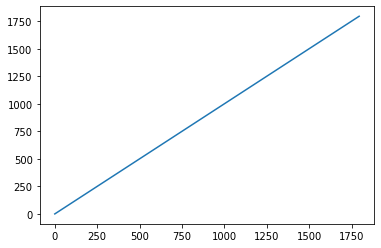

In [5]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id);

Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [6]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

### Company
Посмотрим, сколько компаний содержит наш датасет.

In [7]:
# pd.DataFrame(cacao.company.value_counts())
cacao.company.value_counts()

                    99
Soma                45
Bonnat              26
Fresco              26
Pralus              25
                    ..
Omanhene             1
ChocoReko            1
La Oroquidea         1
Eclat (Felchlin)     1
Malagos              1
Name: company, Length: 408, dtype: int64

### Задание 2.3.1
Сколько уникальных компаний содержится в датасете?

    407 -  верно 

Да уж, немало.

Попробуем отфильтровать лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов.

In [8]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Tan Ban Skrati,1
Omanhene,1
ChocoReko,1
La Oroquidea,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 407 уникальных значений и 99 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

In [9]:
cacao.company.isnull().sum()

99

### specific_origin
Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. 

In [10]:
cacao.specific_origin.value_counts()

                            58
Madagascar                  55
Peru                        44
Ecuador                     39
Dominican Republic          33
                            ..
Millot P., Ambanja           1
Piura, Illanka, Quemazon     1
Vila Gracinda                1
Lago di Como, Blu            1
O'Payo                       1
Name: specific_origin, Length: 1013, dtype: int64

### Задание 2.3.2
Сколько уникальных регионов в датасете?

    1012 -  верно 

### Задание 2.3.3
Сколько значений, встретившихся в столбце более 10 раз?

    15

In [11]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [12]:
(cacao.specific_origin.value_counts()>10).sum()

15

### ref
Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

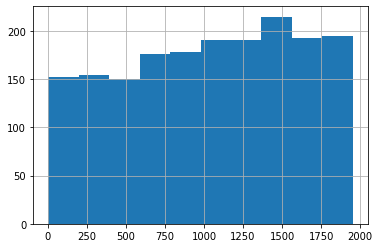

In [13]:
cacao.ref.hist();
cacao.ref.describe()

Как видно, у этого признака нормальное распределение, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

### review_date
Этот столбец также числовой и у него также нет пропусков. Как ведет себя распределение этого признака?

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

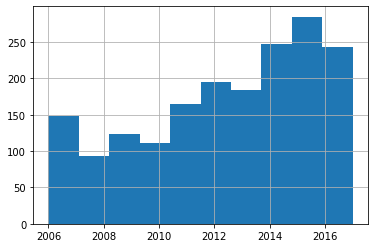

In [14]:
cacao.review_date.hist();
cacao.review_date.describe()

Здесь также заметен тренд на увеличение ревью со временем.

### Задание 2.3.4
Содержит ли этот столбец выбросы?

    Нет - верно

### cocoa_percent
Посмотрим на данные в столбце:

In [15]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

Значения в столбцах представлены в виде процентов. Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец:

In [16]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

Посмотрим распределение признака:

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

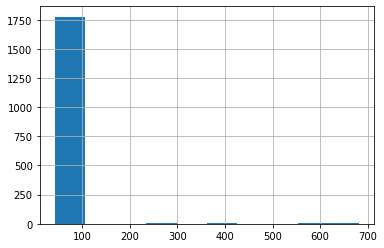

In [17]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

Видим, что основное распределение лежит между  и  процентами и есть потенциальные выбросы свыше % (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,

где IQR = percentile(75) - percentile(25).

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


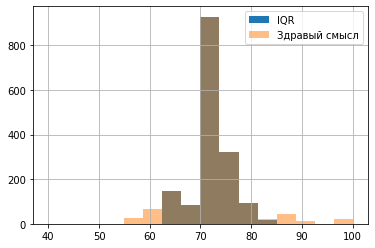

In [18]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR
                                                                       , l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR
                                                    , perc75 + 1.5*IQR)].hist(bins = 16
                                                                          , range = (40, 100), 
                                                                                 label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.

In [19]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

## 2.4. Первичный анализ данных в столбцах. Часть II

### company_location
Посмотрим на данные в столбце страны-производителя:

In [20]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

Стран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью — целых 22. Пустых значений нет (ура!).

In [21]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Russia,1
Wales,1
Niacragua,1
Eucador,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


### rating
Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.

Изучим данные:

In [22]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

Посмотрим на распределение оценок:

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

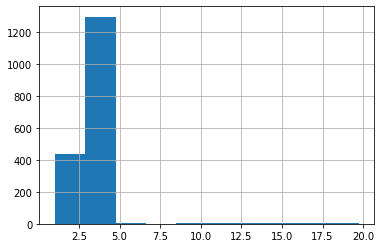

In [23]:
cacao.rating.hist()
cacao.rating.describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

1. Скорее всего была использована пятибалльная шкала оценивания
2. В данных есть выбросы.

Давайте это проверим:

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


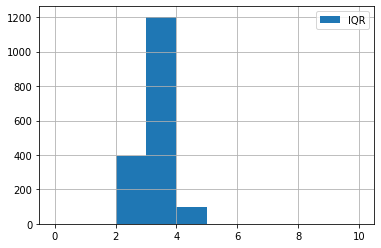

In [24]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [25]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

### bean_type
Сразу заменим пропуски на None:

In [26]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.

Также некоторые батончики сделаны из комбинации какао-бобов. Возможно, этот столбец для дальнейшего анализа нужно будет преобразовать через метод get_dummies(), однако сейчас мы делать этого не будем.

Метод get_dummies() позволяет сделать из одного параметра несколько путём векторизации. С этим методом вы подробно познакомитесь в следующем юните.

In [27]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
EET,3
Matina,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    860 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений в столбце до 21. Пустые значения заполнить не получится, так как есть пять самых популярных (10+ батончиков) сортов какао.

### broad_origin

### Задание 2.4.1
Самостоятельно обработайте пропуски в этом столбце, заменив их на None, и ответьте на вопросы:

Сколько уникальных значений содержит столбец?

    97
Сколько из них встречаются более 10 раз?
  
    25 - от найденного знач-я надо вычесть 1, т.к. broad_origin=None тоже > 10

In [28]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else None if x == '' else None if x == ' ' else x)

display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum()
      - 1)
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"South America, Africa",1
Venezuela/ Ghana,1
"Ghana, Domin. Rep",1
"Peru(SMartin,Pangoa,nacional)",1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1689 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [29]:
pd.DataFrame(cacao.broad_origin.value_counts()>10).head(30)

,broad_origin
Venezuela,True
Ecuador,True
Peru,True
Madagascar,True
Dominican Republic,True
,True
Nicaragua,True
Brazil,True
Bolivia,True
Belize,True


Обратим внимание, что в столбце много повторяющихся значений с различным написанием.

In [30]:
arr = cacao.broad_origin.unique()
# pd.DataFrame(arr).sort_values
arr

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       '\xa0', 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, D

Давайте это исправим, написав дополнительную функцию:

In [31]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

Посмотрим, как изменились данные:

In [32]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
Tobago,1
"DomincanRepublic,Bali",1
"Ecuador,Madagascar,PapuaNewGuinea",1
"Indonesia,Ghana",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1689 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений (хотя и всего на 4). Однако такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

## 2.5. Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

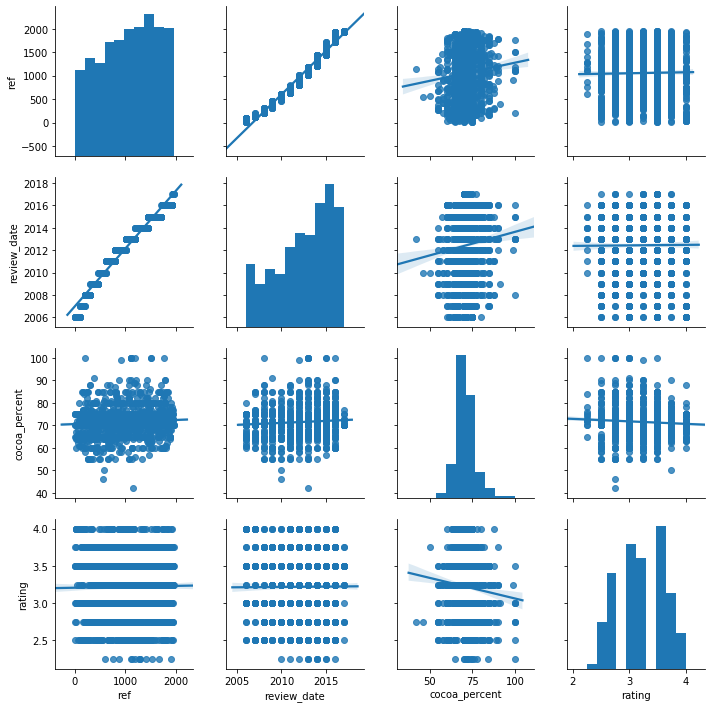

In [33]:
sns.pairplot(cacao, kind = 'reg');

Используем для наглядности матрицу корреляций:

In [34]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

## 2.6. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

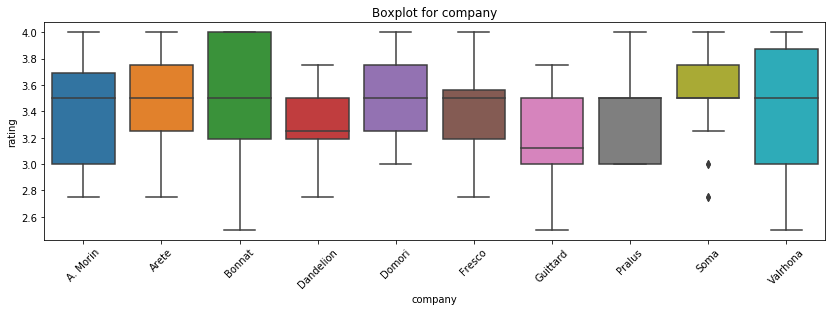

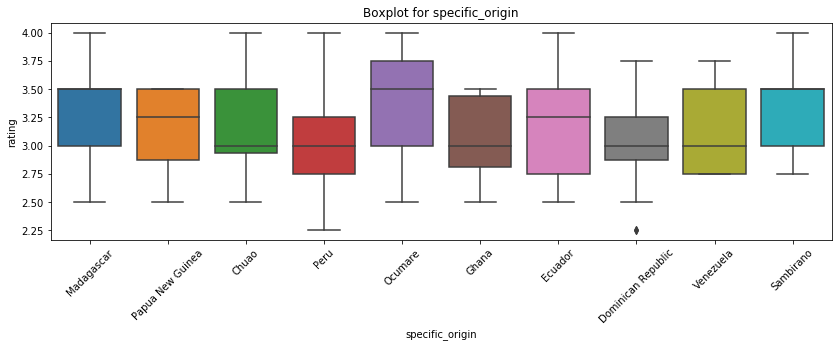

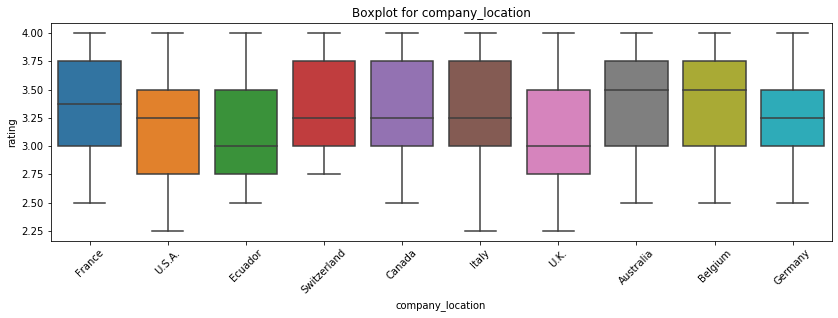

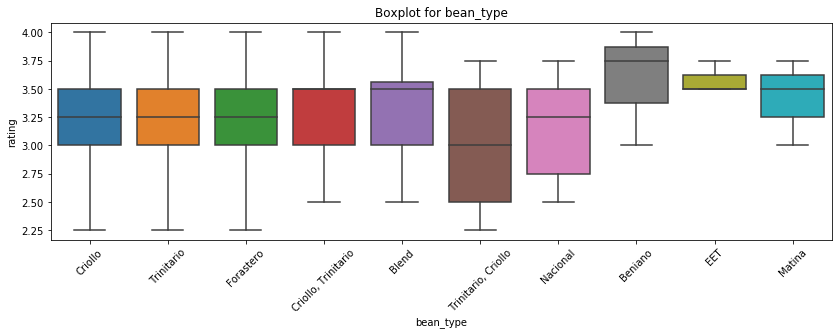

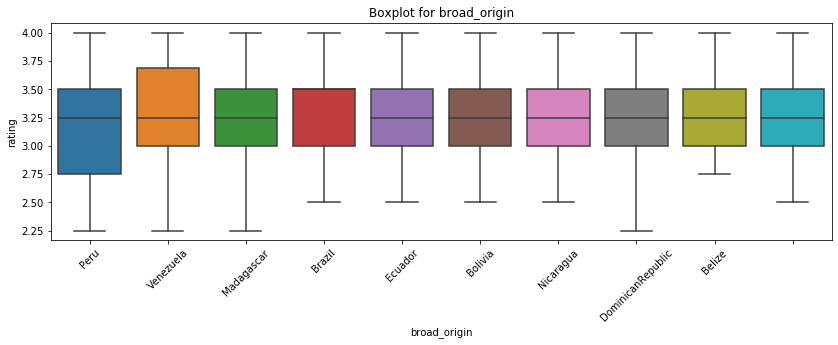

In [35]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [36]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [37]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 
                                'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


## 2.7. Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:
- В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
- Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
- Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.

## 2.8. Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Наш датасет находится здесь - https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST_through+14OCT2019+type@asset+block/stud_math.csv.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

### Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

Максимальный балл за проект: 20

Проходной балл: 14

### Дополнительные материалы
Примеры качественного EDA - https://www.kaggle.com/artgor/notebooks

### Критерии оценивания проекта ментором
За каждый критерий можно получить от 0 до 4 баллов. 

Что означают баллы:

0	задание не выполнено или результатами работы невозможно воспользоваться на практике

1	есть большие неточности в выполнении задания

2	задача решена, требуются минимальные доработки

3	задача решена полностью, можно использовать результат на практике

4	предложенное решение выше ожиданий

Вот по каким критериям проект будет оценивать ментор:
1. Качество кода и соответствие стандартам оформления pep-8.
2. Для каждого столбца найдено количество пустых строк, найдены и убраны выбросы. 
3. Для количественных переменных построены гистограммы распределений и сделаны выводы.
4. Проведён корреляционный анализ и анализ номинативных переменных, корректно отобраны переменные для построения модели.
5. Сформулированы промежуточные и итоговые выводы.

### 2.8. ОТПРАВИТЬ ПРОЕКТ НА ПРОВЕРКУ

Это задание выполняется в несколько шагов. На первом шаге вы даете ответ на вопрос. Следующие шаги появятся ниже поля Ваш ответ.

Введите свой ответ на вопрос. Вы можете сохранить свою работу и завершить её в любое время до истечения срока сдачи (понедельник, 1 янв. 2029 г. 03:00 MSK). После того, как вы отправите свой ответ на проверку, вы не сможете его изменить.

#### Вопрос для этого раздела
##### Шаг 1. 
Создайте папку в своем Git-репозитории skillfactory_rds по типу module_<номер модуля> и загрузите туда своё решение. 

##### Шаг 2. 
Загрузите проект на github.

Проект должен содержать два файла: краткое описание и ноутбук с решением.

Не забудьте!

В описании кратко укажите:

→ основные цели и задачи проекта;

→ краткую информацию о данных;

→ этапы работы над проектом.

→ ответы на вопросы саморефлексии:

1. Какова была ваша роль в команде?

2. Какой частью своей работы вы остались особенно довольны?

3. Что не получилось сделать так, как хотелось? Над чем ещё стоит поработать?

4. Что интересного и полезного вы узнали в этом модуле?

5. Что является вашим главным результатом при прохождении этого проекта?

6. Какие навыки вы уже можете применить в текущей деятельности?

7. Планируете ли вы дополнительно изучать материалы по теме проекта?

Ноутбук с решением должен содержать:

→ цели и задачи проекта;

→ поэтапное описание работы;

→ промежуточные выводы;

→ основные итоги работы.

*Дополнительно: оставьте комментарий по своей работе для ментора.

##### Шаг 3. 
В поле ниже вставьте ссылку на свой notebook. Позднее ментор даст вам развернутую обратную связь. 

Ссылка на notebook: !!! заполнить !!!

### Что после?
После дедлайна этого модуля ментор проведет созвон с разбором решений. Приблизительная структура созвона:
1. Авторское решение.
2. Лучшие решения.
3. Примеры, как нужно и как не нужно делать.
4. Различные варианты решения сложных вопросов.
5. Ответы на ваши вопросы.
6. Рекомендации по дальнейшему развитию.

## Обратная связь

In [38]:
# 21.05.2020 - 2 ч.
# 22.05.2020 - 1 ч.